# Multiple Linear Regression

## Bike Sharing Assignment

#### Problem Statement:

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Step 1: Reading and Understanding the Data

Let us first import Libraries and read the housing dataset

#### All the libraries which we need to use

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler #preprocessing is library & MinMaxScaler is a class
from sklearn.metrics import r2_score

In [5]:
import statsmodels.api as sm
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

### The steps we will follow in the excersice are as follows:- 

- 1) **Reading , Understanding & Visulizing the data.**

(this is an important line where we will gain intutive understanding of the data_set.)
- 2) **Preparing the data for modeling (train-test split, rescaling, etc.).**

( Here we will split the data into train & test set, will do some pre-processing steps this time because in multiple regression these are important, rescaling, etc.)
- 3) **Testing the model.**

(we learn the coefficient and the intercept, and training the model in multiple regression settings we'll need to do a lot more in terms of selecting the right variables, removing variables with multi-collinearity and other things)
- 4) **Residual analysis.**

( finally, we'll do residual analysis)
- 5) **Predictions & evaluation on the test set.**

(and then, we'll make predictions on train & test sets.) 

**This is the overall structure of problem statement**

In [6]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


the prediction of demand for shared bikes

cnt: count of total rental bikes including both casual and registered

In [7]:
# looking at no. of rows & columns 
df.shape

(730, 16)

We have 730 entries.

In [8]:
# Checking if there any missing value in any column. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


we dont have any missing values here.

In [9]:
# To get stastical summeries of all numeric variables.
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
df = df.drop(['casual','registered'], axis=1)

In [11]:
df = df.drop(['dteday','instant','atemp'], axis=1)

In [12]:
df.shape

(730, 11)

dropped 5 columns so far. 

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [13]:
df.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

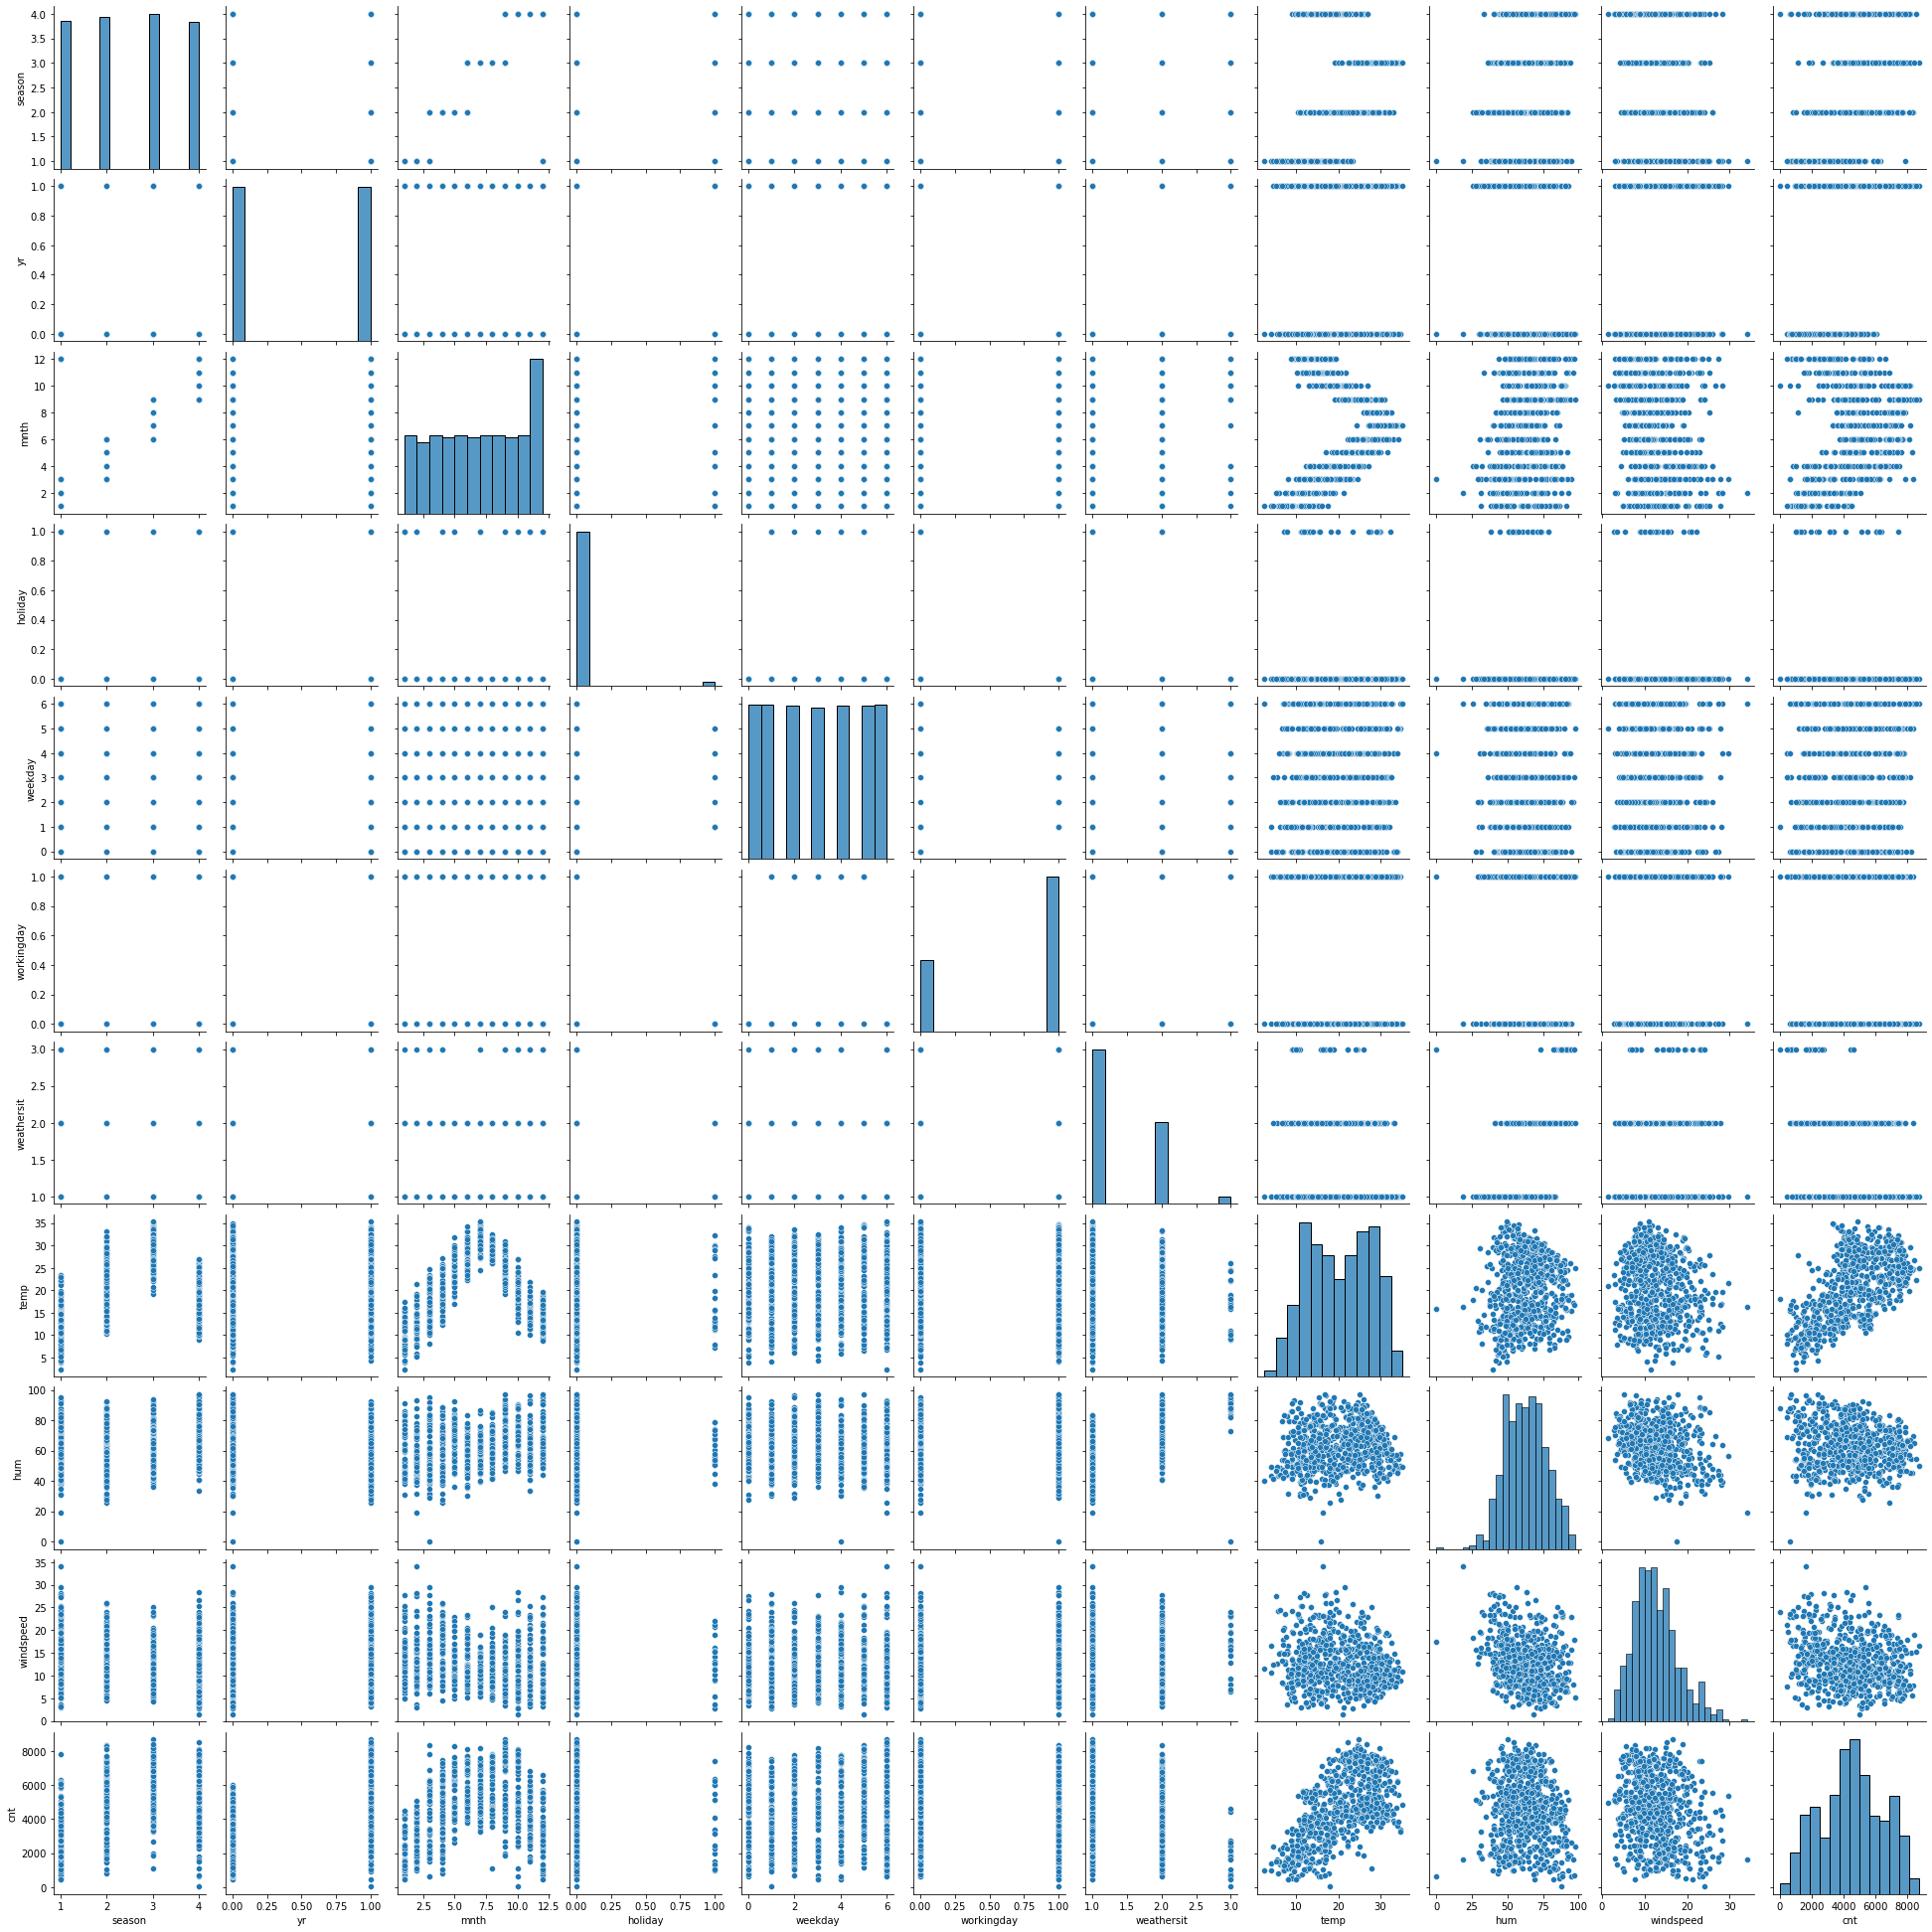

In [14]:
# visualizing the numeric variable data. 
sns.pairplot(df)
plt.show();

#### Positive correlation between :-
- mnth/cnt(slight)
- temp/cnt(strong)
- year/cnt(strong)
- season/cnt(slight)
- weekday/cnt(slight)
- weathersit/cnt(strong)

#### Negative correlation between :- 
- holiday/cnt (strong)

#### Creating Sub_Set. 

In [15]:
# Creating Sub_Set. 

catlist = df[['season','yr','mnth','holiday',
              'weekday','workingday','weathersit','cnt']]

catlist.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,cnt
0,1,0,1,0,6,0,2,985
1,1,0,1,0,0,0,2,801
2,1,0,1,0,1,1,1,1349
3,1,0,1,0,2,1,1,1562
4,1,0,1,0,3,1,1,1600


#### Changing  values of variables.

In [16]:
catlist['season'] = catlist['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [17]:
df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [18]:
catlist['yr'] = catlist['yr'].map({0:"2018", 1:'2019'})
catlist['yr'].value_counts()

2019    365
2018    365
Name: yr, dtype: int64

In [19]:
catlist['mnth'] = catlist['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
                                5:'May', 6:'June', 7:'July', 8:'Aug',
                                9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})
catlist['mnth'].value_counts()

Mar     62
Oct     62
Dec     62
May     62
Jan     62
Aug     62
July    62
Apr     60
Sept    60
June    60
Nov     60
Feb     56
Name: mnth, dtype: int64

In [20]:
catlist['weathersit'] = catlist['weathersit'].map({1: 'pleasant', 2: 'Mild', 3: 'Bad', 4: 'Worst'})

catlist['weathersit'].value_counts()

pleasant    463
Mild        246
Bad          21
Name: weathersit, dtype: int64

In [21]:
catlist['weekday'] = catlist['weekday'].map({1:'Wed', 2:'Thurs', 3:'Fri', 4:'Sat', 5:'Sun', 6:'Mon', 0:'Tues'})

catlist['weekday'].value_counts()

Wed      105
Mon      105
Tues     105
Thurs    104
Sun      104
Sat      104
Fri      103
Name: weekday, dtype: int64

In [22]:
catlist['workingday'] = catlist['workingday'].map({0:"No", 1:"Yes"})

In [23]:
catlist['workingday'].astype('category').value_counts()

Yes    499
No     231
Name: workingday, dtype: int64

In [24]:
catlist['holiday'] = catlist['holiday'].map({0:"no_holiday", 1:"yes_holiday"})

In [25]:
catlist['holiday'].value_counts()

no_holiday     709
yes_holiday     21
Name: holiday, dtype: int64

### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

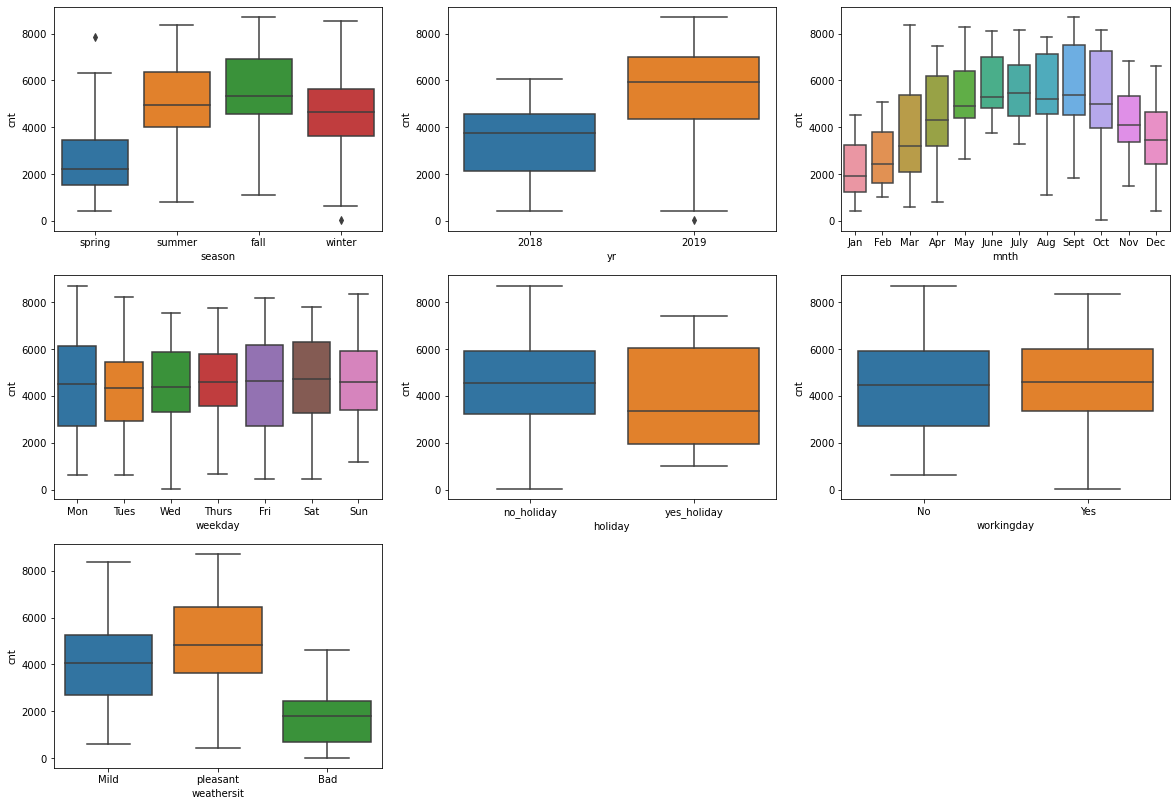

In [26]:
plt.figure(figsize=(20,14))

plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt', data=catlist)

plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt', data=catlist)

plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt', data=catlist)

plt.subplot(3,3,4)
sns.boxplot(x='weekday',y='cnt', data=catlist)

plt.subplot(3,3,5)
sns.boxplot(x='holiday',y='cnt', data=catlist)

plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt', data=catlist)

plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt', data=catlist)

plt.show()

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `mnth` with `yr` as the hue.

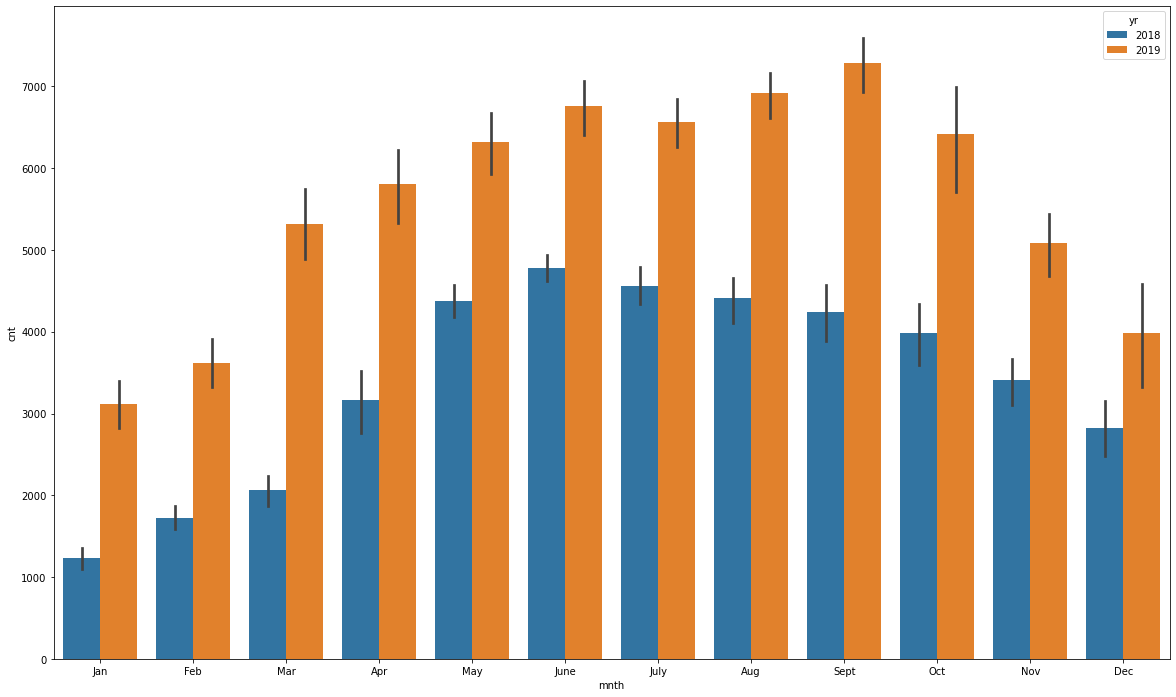

In [27]:
plt.figure(figsize = (20,12))
sns.barplot(x = 'mnth', y = 'cnt', hue = 'yr', data = catlist)
plt.show()

Below is the plot for `weekday` with `mnth` as the hue.

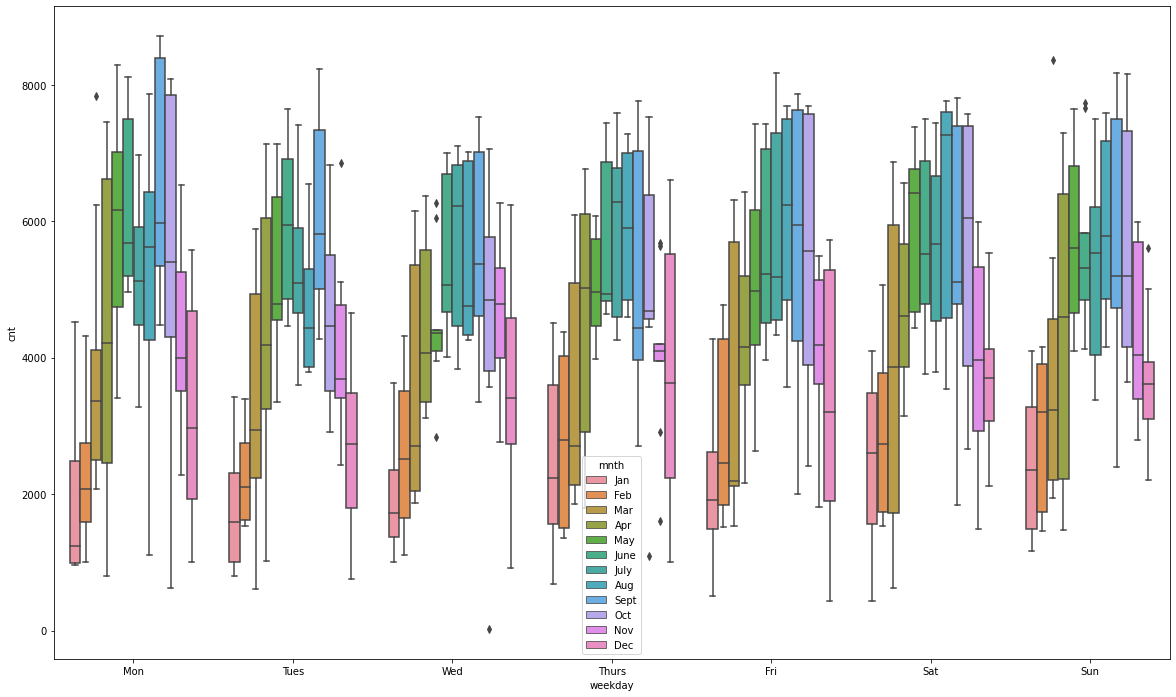

In [28]:
plt.figure(figsize = (20,12))
sns.boxplot(x = 'weekday', y = 'cnt', hue = 'mnth', data = catlist)
plt.show()

Below is the plot for `weekday` with `workingday` as the hue.

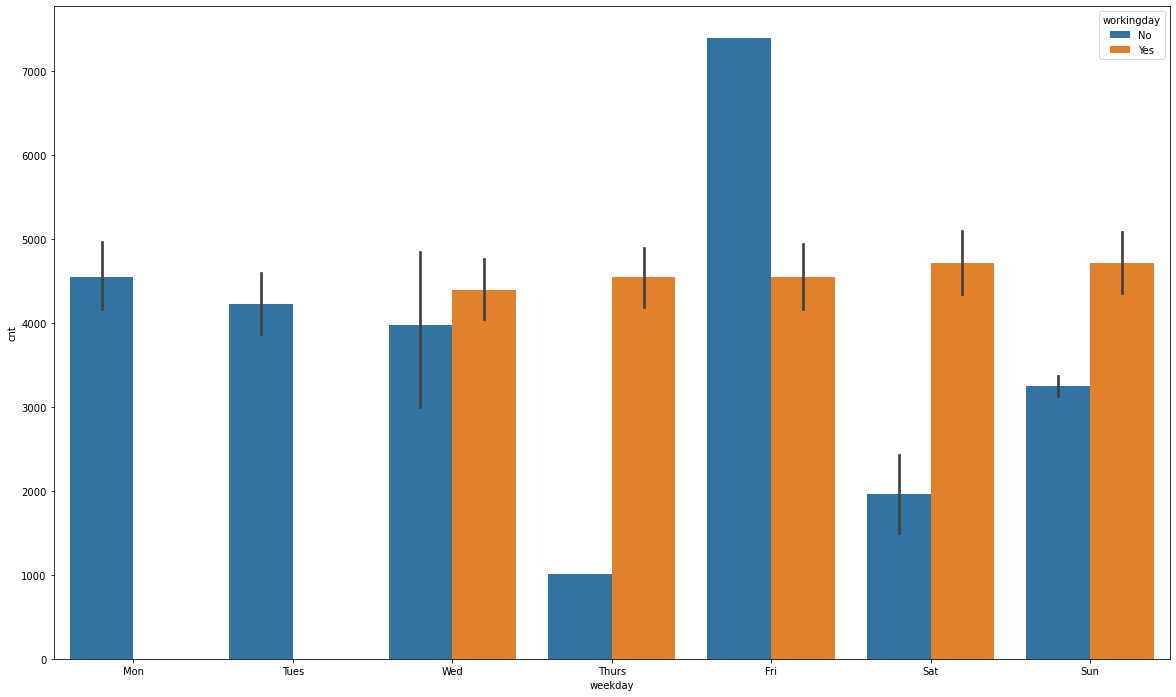

In [29]:
plt.figure(figsize = (20,12))
sns.barplot(x = 'weekday', y = 'cnt', hue = 'workingday', data = catlist)
plt.show()

 Below is the plot for `weekday` with `holiday` as the hue.

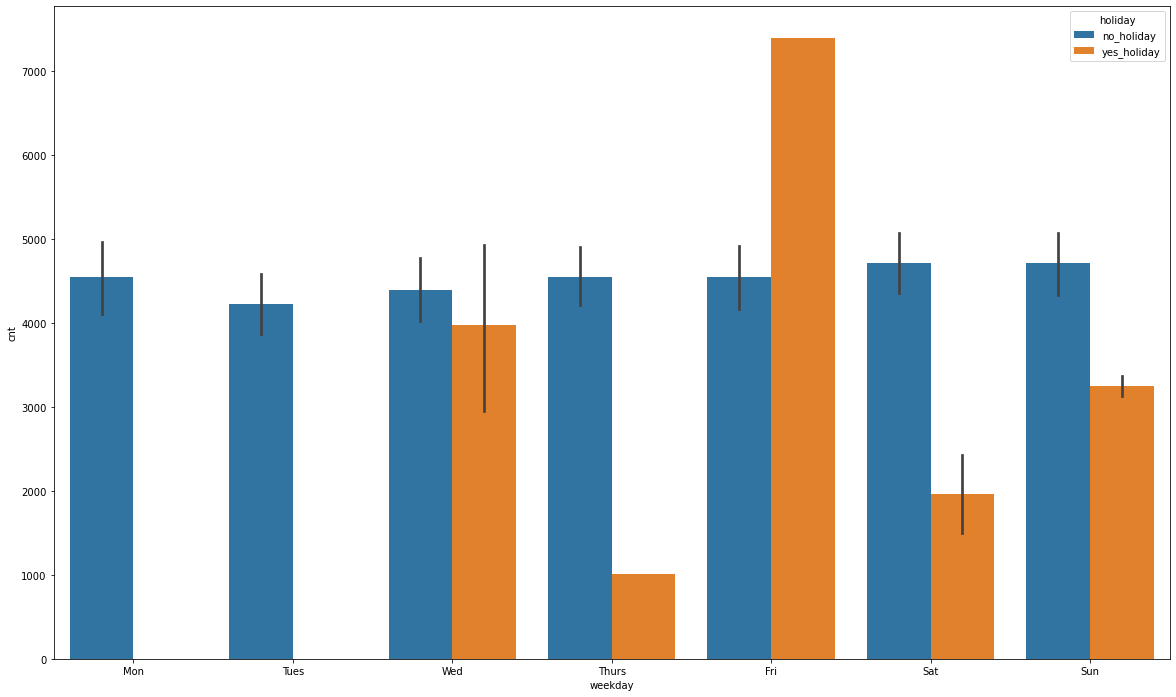

In [30]:
plt.figure(figsize = (20,12))
sns.barplot(x = 'weekday', y = 'cnt', hue = 'holiday', data = catlist)
plt.show()

## Step 3: Data Preparation

- We can see that, the dataset has 2 columns with interpretation values as 'Yes' or 'No' as '1' or '0'.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1's and 0's, 

- where 1 is a 'Yes' and 0 is a 'No'.

In [31]:
catlist.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,cnt
0,spring,2018,Jan,no_holiday,Mon,No,Mild,985
1,spring,2018,Jan,no_holiday,Tues,No,Mild,801
2,spring,2018,Jan,no_holiday,Wed,Yes,pleasant,1349
3,spring,2018,Jan,no_holiday,Thurs,Yes,pleasant,1562
4,spring,2018,Jan,no_holiday,Fri,Yes,pleasant,1600


### Dummy Variables

In [32]:
# Get the dummy variables for the feature 'weekdays' and 
# store it in a new variable - 'status'
status = pd.get_dummies(catlist['weekday'])

status.head()

,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0


In [33]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(catlist['weekday'], drop_first = True)
status.head()

,Mon,Sat,Sun,Thurs,Tues,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [34]:
# Add the results to the original housing dataframe

df_1 = pd.concat([df, status], axis = 1)
df_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Mon,Sat,Sun,Thurs,Tues,Wed
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,1,0,0,0,0,0
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,0,0,0,0,1,0
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0,1
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0


In [35]:
# Drop 'furnishingstatus' as we have created the dummies for it

df_1.drop(['weekday'], axis = 1, inplace = True)
df_1.head()

,season,yr,mnth,holiday,workingday,weathersit,temp,hum,windspeed,cnt,Mon,Sat,Sun,Thurs,Tues,Wed
0,1,0,1,0,0,2,14.110847,80.5833,10.749882,985,1,0,0,0,0,0
1,1,0,1,0,0,2,14.902598,69.6087,16.652113,801,0,0,0,0,1,0
2,1,0,1,0,1,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0,1
3,1,0,1,0,1,1,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0
4,1,0,1,0,1,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0


In [36]:
# Get the dummy variables for the feature 'weekdays' and store it in a new variable - 'status'
status = pd.get_dummies(catlist['season'])

# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(catlist['season'], drop_first = True)

# Add the results to the original housing dataframe
df_1 = pd.concat([df_1, status], axis = 1)

# Drop 'furnishingstatus' as we have created the dummies for it
df_1.drop(['season'], axis = 1, inplace = True)

df_1.head(2)

,yr,mnth,holiday,workingday,weathersit,temp,hum,windspeed,cnt,Mon,Sat,Sun,Thurs,Tues,Wed,spring,summer,winter
0,0,1,0,0,2,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0
1,0,1,0,0,2,14.902598,69.6087,16.652113,801,0,0,0,0,1,0,1,0,0


In [37]:
# Get the dummy variables for the feature 'weekdays' and store it in a new variable - 'status'
status = pd.get_dummies(catlist['mnth'])

# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(catlist['mnth'], drop_first = True)

# Add the results to the original housing dataframe
df_1 = pd.concat([df_1, status], axis = 1)

# Drop 'furnishingstatus' as we have created the dummies for it
df_1.drop(['mnth'], axis = 1, inplace = True)

df_1.head(2)

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,Mon,Sat,Sun,Thurs,Tues,Wed,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
0,0,0,0,2,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,2,14.902598,69.6087,16.652113,801,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [38]:
# Get the dummy variables for the feature 'weekdays' and store it in a new variable - 'status'
status = pd.get_dummies(catlist['weathersit'])

# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(catlist['weathersit'], drop_first = True)

# Add the results to the original housing dataframe
df_1 = pd.concat([df_1, status], axis = 1)

# Drop 'furnishingstatus' as we have created the dummies for it
df_1.drop(['weathersit'], axis = 1, inplace = True)

df_1.head(2)

,yr,holiday,workingday,temp,hum,windspeed,cnt,Mon,Sat,Sun,Thurs,Tues,Wed,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept,Mild,pleasant
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [39]:
df_1['yr'].value_counts()

1    365
0    365
Name: yr, dtype: int64

In [40]:
df_1.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Mon,Sat,Sun,Thurs,Tues,Wed,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept,Mild,pleasant
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [41]:
df_1.shape

(730, 29)

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [42]:
# We specify this so that the train and test data set always have 
# the same rows, respectively.
np.random.seed(0)
df_train, df_test = train_test_split(df_1, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features by using MIn-Max Scaler.

In [43]:
scaler = MinMaxScaler()

In [44]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train[num_vars].head()

,temp,hum,windspeed,cnt
653,0.509887,0.575354,0.300794,0.864243
576,0.815169,0.725633,0.264686,0.827658
426,0.442393,0.640189,0.255342,0.465255
728,0.245101,0.498067,0.663106,0.204096
482,0.395666,0.504508,0.188475,0.482973


In [45]:
# To verify that all the values are in between 0 & 1
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Mon,Sat,Sun,Thurs,Tues,Wed,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept,Mild,pleasant
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.343137,0.627451
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.475223,0.483958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


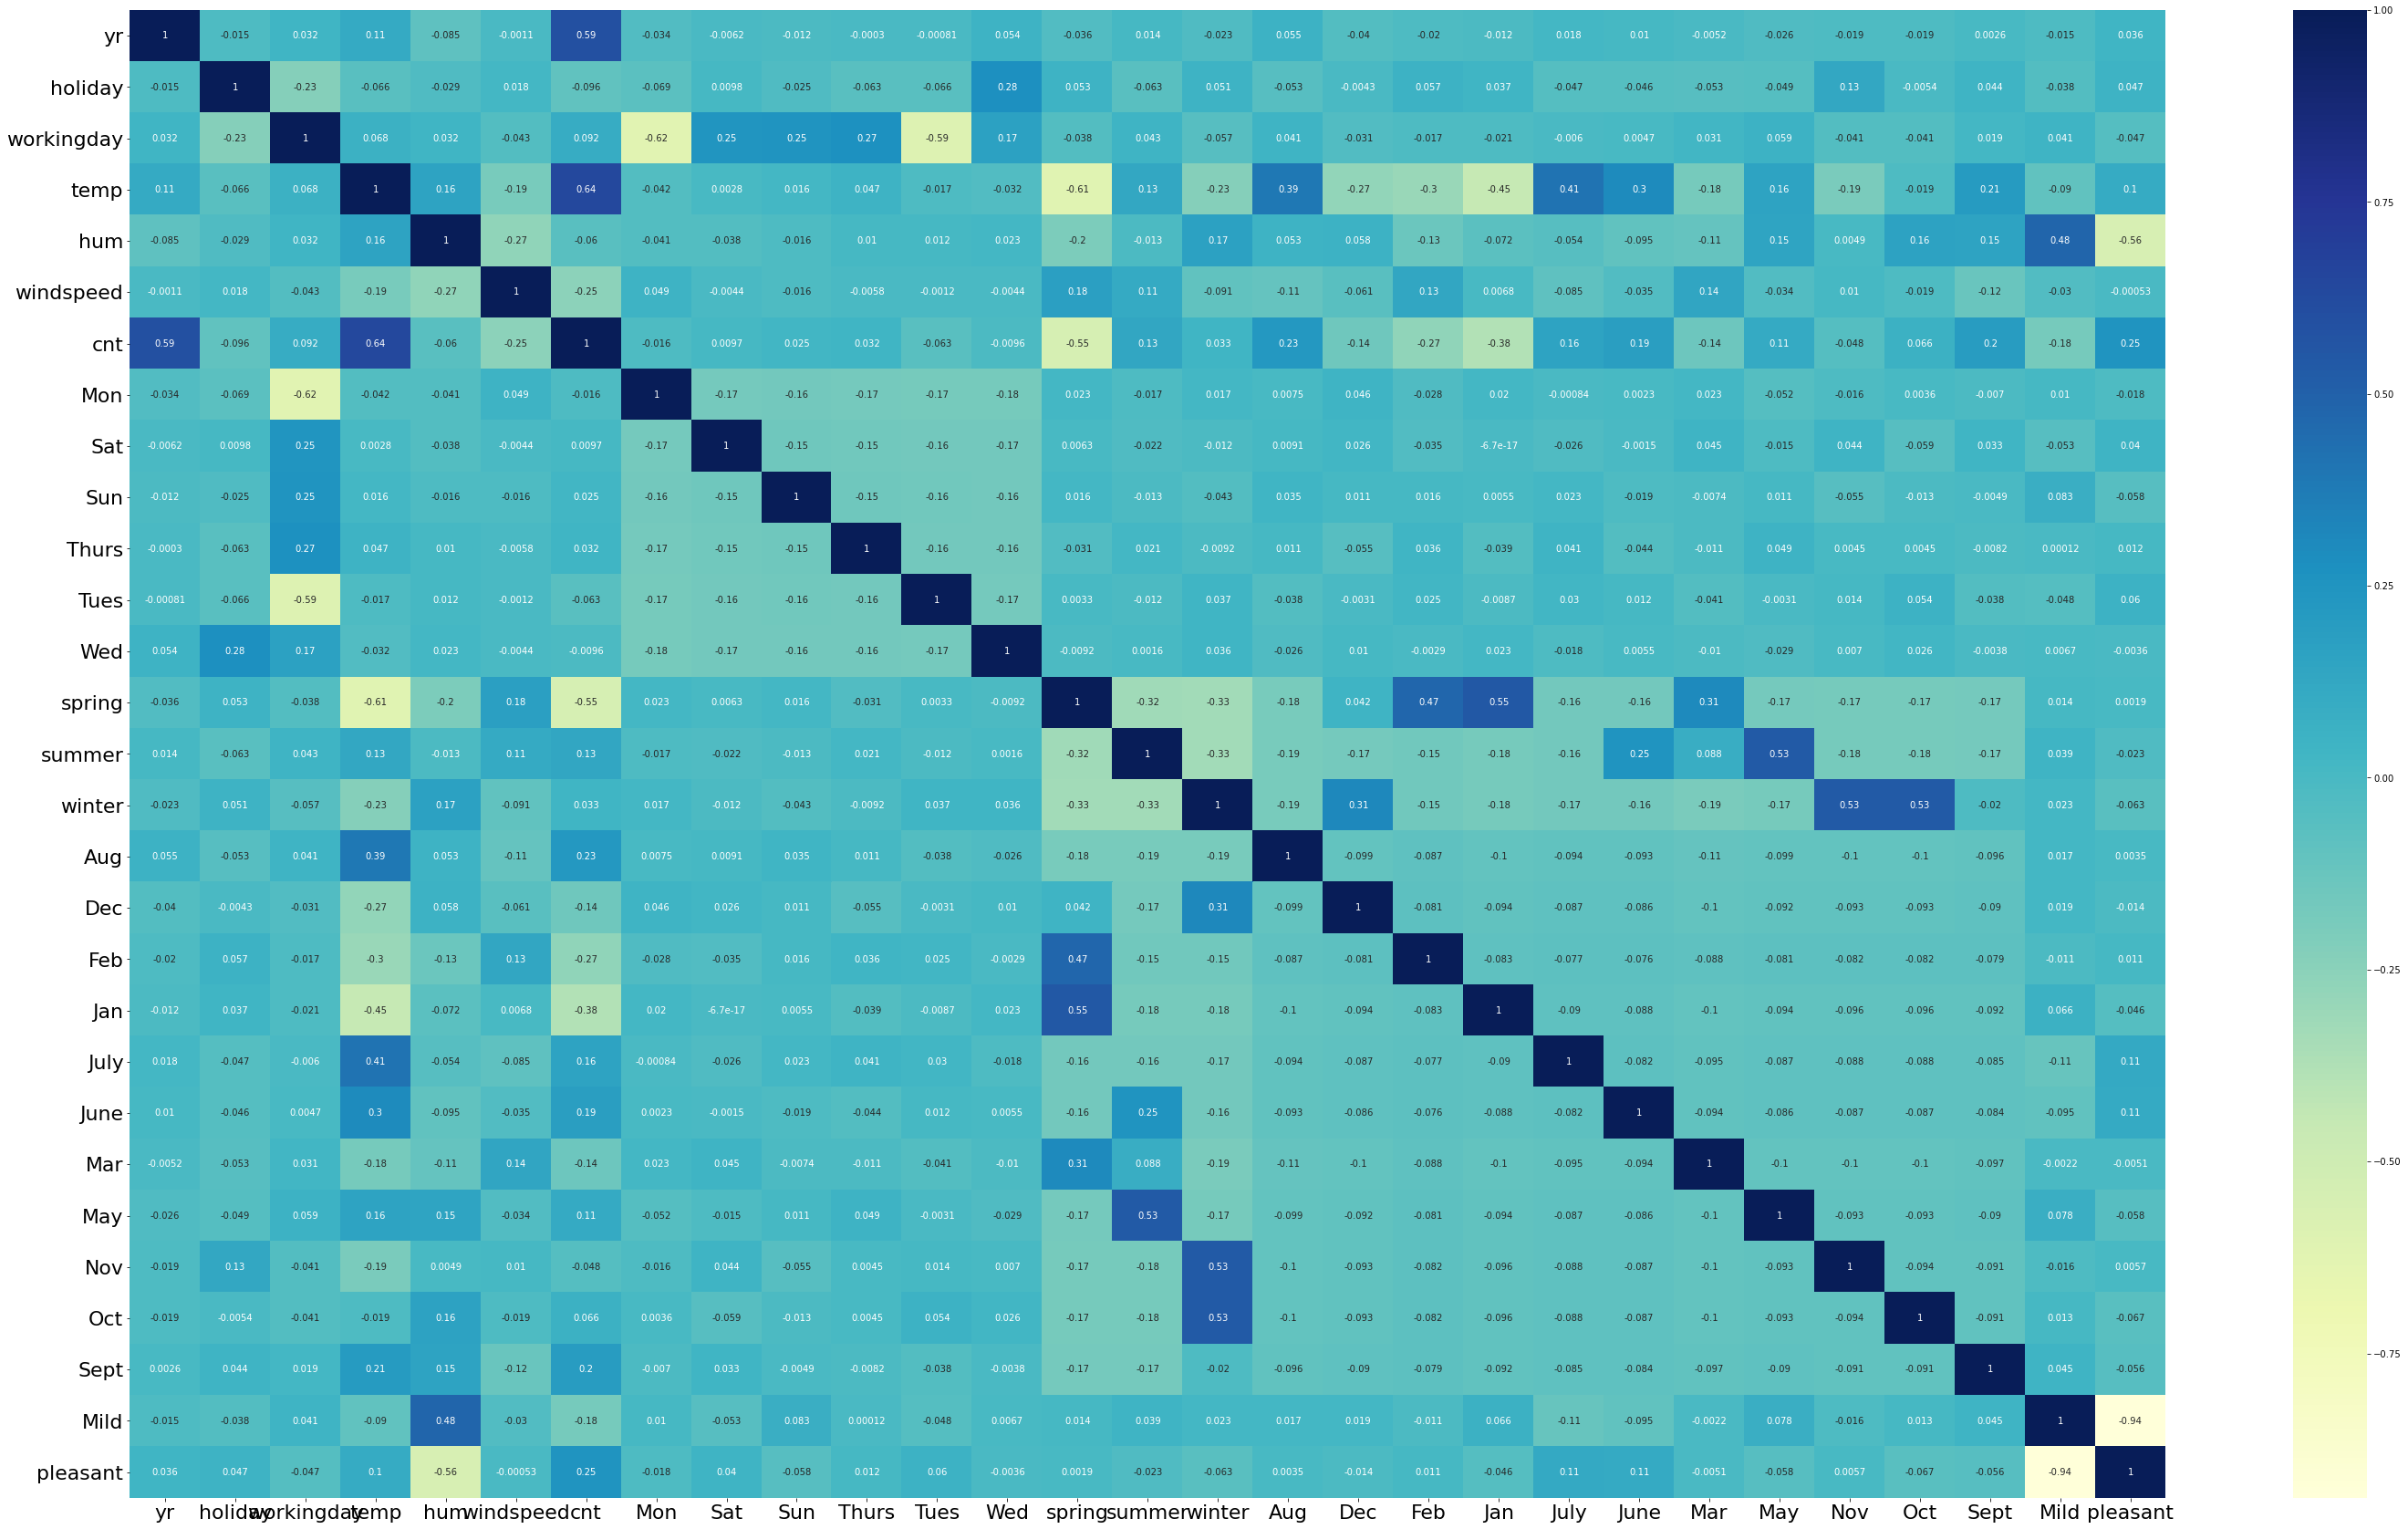

In [46]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (50, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.xticks(fontsize= 22)
plt.yticks(fontsize= 22)

plt.show()

As you might have noticed, `temp` seems to the correlated to `cnt` the most ( thrir correlation coefficient = 0.64). Let's see a pairplot for `temp` vs `cnt`.

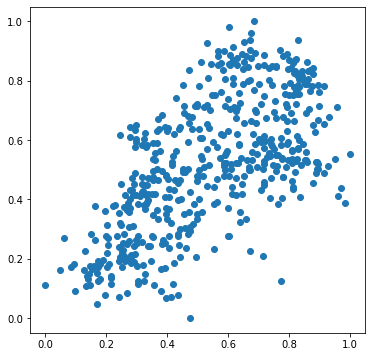

In [47]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

As, the spread of `temp` is like a funnel shaped. but still we can fit a line in it. So, we can pick `temp` as the first variable to start with. but it have a very large amount of columns. So, we will try,

The bottom-up approach was just to give us an idea of how the parameters change when the number of variables is increased.

we first build a model using all and then try to improve the model by dropping some of them.

Let’s now build a model with all the available variables.

To start let's look at all the columns which we have in dataset

### Dividing into X and Y sets for the model building

In [48]:
# Create X & y for train we need. a  X_train & a y_train. which we will make from df_train.
y_train = df_train.pop('cnt') # basically extract the column price from df_train. So, it just remove the column in place & assign it to y_train then whatelse remains is X_train.
X_train = df_train # whatever remain is assigned to X_train.

In [49]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,Mon,Sat,Sun,Thurs,Tues,Wed,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept,Mild,pleasant
653,1,0,1,0.509887,0.575354,0.300794,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [50]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [51]:
df_1.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'Mon',
       'Sat', 'Sun', 'Thurs', 'Tues', 'Wed', 'spring', 'summer', 'winter',
       'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Sept', 'Mild', 'pleasant'],
      dtype='object')

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`.

In [52]:
# build a model with all variables  
X_train_sm =  sm.add_constant(X_train)

# Create the model,
lr = sm.OLS(y_train, X_train_sm)

# Fit the model,
lr_model = lr.fit()

# To Check the parameters and other statics.
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          8.74e-182
Time:                        20:47:43   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0370      0.043      0.858      0.391      -0.048       0.122
yr             0.2321      0.008     28.820      0.000       0.216       0.248
holiday       -0.0448      0.025     -1.791      0.074      -0.094       0.004
workingday     0.0422      0.013      3.189      0.002       0.016       0.068
temp           0.4506      0.046      9.734      0.000       0.360       0.542
hum           -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed     -0.1865      0.026     -7.257      0.000      -0.237      -0.136
Mon            0.0471      0.015      3.195      0.001       0.018       0.076
Sat           -0.0038      0.015     -0.263      0.793      -0.033       0.025
Sun            0.0054      0.015      0.362      0.718      -0.024       0.035
Thurs         -0.0135      0.015     -0.917      0.359      -0.042       0.015
Tues          -0.0075      0.015     -0.489      0.625      -0.038       0.023
Wed           -0.0155      0.015     -1.064      0.288      -0.044       0.013
spring        -0.0482      0.030     -1.607      0.109      -0.107       0.011
summer         0.0387      0.026      1.478      0.140      -0.013       0.090
winter         0.1058      0.028      3.794      0.000       0.051       0.161
Aug            0.0144      0.034      0.428      0.669      -0.052       0.081
Dec           -0.0456      0.034     -1.358      0.175      -0.112       0.020
Feb           -0.0323      0.033     -0.982      0.327      -0.097       0.032
Jan           -0.0628      0.034     -1.873      0.062      -0.129       0.003
July          -0.0404      0.035     -1.151      0.250      -0.109       0.029
June          -0.0030      0.025     -0.119      0.906      -0.052       0.046
Mar            0.0010      0.025      0.043      0.966      -0.047       0.049
May            0.0239      0.021      1.140      0.255      -0.017       0.065
Nov           -0.0419      0.036     -1.152      0.250      -0.113       0.030
Oct            0.0075      0.036      0.211      0.833      -0.063       0.078
Sept           0.0811      0.032      2.533      0.012       0.018       0.144
Mild           0.1964      0.025      7.869      0.000       0.147       0.245
pleasant       0.2574      0.026      9.778      0.000       0.206       0.309
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     1.79e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [53]:
# Create a dataframe that will contain the names of 
# all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,126.48
6,Mon,29.04
10,Tues,27.49
12,spring,10.79
27,pleasant,10.58
14,winter,9.50
26,Mild,9.16
13,summer,8.29
3,temp,7.12
23,Nov,6.80


Now, we will drop `Mar` as it has very high p-value(0.956) so it is less significant even if the VIF (3.47) is low.

### Dropping on the basis of very high p-value

### Dropping Mar

The R-squared value obtained is `0.853`.

Since we have so many variables, we can clearly improve this. 

So let's go ahead and remove the least correlated variable, i.e. `March`.

In [54]:
# Dropping "Mar"
X = X_train.drop('Mar', axis=1) 
# we dropped "Mar" from dataset and store it(data without "Mar")
# in new dataset X.

In [55]:
# Creating another model without the "Mar" Column:

# build a model with all variables  
X_train_sm =  sm.add_constant(X)

# Create the model,
lr = sm.OLS(y_train, X_train_sm)

# Fit the model,
lr_model = lr.fit()

# parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          8.33e-183
Time:                        20:47:44   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     483   BIC:                            -887.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0375      0.041      0.910      0.363      -0.043       0.118
yr             0.2321      0.008     28.850      0.000       0.216       0.248
holiday       -0.0446      0.025     -1.800      0.073      -0.093       0.004
workingday     0.0423      0.013      3.309      0.001       0.017       0.067
temp           0.4502      0.046      9.870      0.000       0.361       0.540
hum           -0.1512      0.038     -3.947      0.000      -0.226      -0.076
windspeed     -0.1865      0.026     -7.275      0.000      -0.237      -0.136
Mon            0.0472      0.014      3.296      0.001       0.019       0.075
Sat           -0.0038      0.015     -0.262      0.794      -0.033       0.025
Sun            0.0054      0.015      0.362      0.718      -0.024       0.035
Thurs         -0.0135      0.015     -0.919      0.359      -0.042       0.015
Tues          -0.0074      0.015     -0.491      0.624      -0.037       0.022
Wed           -0.0155      0.015     -1.065      0.287      -0.044       0.013
spring        -0.0478      0.028     -1.683      0.093      -0.103       0.008
summer         0.0385      0.026      1.500      0.134      -0.012       0.089
winter         0.1061      0.027      3.872      0.000       0.052       0.160
Aug            0.0139      0.032      0.439      0.661      -0.048       0.076
Dec           -0.0465      0.026     -1.793      0.074      -0.097       0.004
Feb           -0.0333      0.022     -1.497      0.135      -0.077       0.010
Jan           -0.0638      0.022     -2.862      0.004      -0.108      -0.020
July          -0.0408      0.033     -1.223      0.222      -0.106       0.025
June          -0.0033      0.024     -0.139      0.889      -0.050       0.043
May            0.0236      0.020      1.203      0.230      -0.015       0.062
Nov           -0.0427      0.031     -1.389      0.166      -0.103       0.018
Oct            0.0067      0.031      0.221      0.825      -0.053       0.067
Sept           0.0805      0.029      2.772      0.006       0.023       0.138
Mild           0.1964      0.025      7.877      0.000       0.147       0.245
pleasant       0.2574      0.026      9.788      0.000       0.206       0.309
==============================================================================
Omnibus:                       84.450   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.543
Skew:                          -0.803   Prob(JB):                     7.12e-52
Kurtosis:                       5.916   Cond. No.                     1.76e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.69e-28. This might indicate

Now, we dont have the `Mar`. The p-vlaues are here.

also, look at the VIF

In [56]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,115.56
6,Mon,26.52
10,Tues,25.31
26,pleasant,10.58
12,spring,9.69
14,winter,9.18
25,Mild,9.16
13,summer,7.98
3,temp,6.93
1,holiday,5.77


Now, we will drop `June` as it has very high p-value(0.889) so it is less significant. even if the VIF (2.54) is low.

### Similarly, dropping other variables and modeling the data 

### Dropping June

In [57]:
# Dropping "June"
X = X.drop('June', axis=1) 
# we dropped "June" from dataset and store it in new dataset X.

In [58]:
# Creating another model without the "Mar & June" Columns:

# build a model with all variables  
X_train_sm =  sm.add_constant(X)

# Create the model,
lr = sm.OLS(y_train, X_train_sm)

# Fit the model,
lr_model = lr.fit()

# parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.6
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          7.84e-184
Time:                        20:47:44   Log-Likelihood:                 527.94
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     484   BIC:                            -893.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0370      0.041      0.903      0.367      -0.044       0.118
yr             0.2322      0.008     29.056      0.000       0.217       0.248
holiday       -0.0446      0.025     -1.800      0.073      -0.093       0.004
workingday     0.0422      0.013      3.313      0.001       0.017       0.067
temp           0.4469      0.039     11.585      0.000       0.371       0.523
hum           -0.1506      0.038     -3.958      0.000      -0.225      -0.076
windspeed     -0.1862      0.025     -7.302      0.000      -0.236      -0.136
Mon            0.0470      0.014      3.301      0.001       0.019       0.075
Sat           -0.0038      0.015     -0.257      0.797      -0.032       0.025
Sun            0.0054      0.015      0.366      0.715      -0.024       0.035
Thurs         -0.0134      0.015     -0.914      0.361      -0.042       0.015
Tues          -0.0075      0.015     -0.505      0.614      -0.037       0.022
Wed           -0.0155      0.015     -1.066      0.287      -0.044       0.013
spring        -0.0465      0.027     -1.729      0.084      -0.099       0.006
summer         0.0394      0.025      1.592      0.112      -0.009       0.088
winter         0.1068      0.027      3.971      0.000       0.054       0.160
Aug            0.0167      0.025      0.672      0.502      -0.032       0.065
Dec           -0.0462      0.026     -1.789      0.074      -0.097       0.005
Feb           -0.0336      0.022     -1.515      0.131      -0.077       0.010
Jan           -0.0643      0.022     -2.922      0.004      -0.108      -0.021
July          -0.0378      0.026     -1.471      0.142      -0.088       0.013
May            0.0249      0.017      1.436      0.152      -0.009       0.059
Nov           -0.0420      0.030     -1.385      0.167      -0.102       0.018
Oct            0.0078      0.030      0.264      0.792      -0.050       0.066
Sept           0.0827      0.024      3.396      0.001       0.035       0.131
Mild           0.1964      0.025      7.884      0.000       0.147       0.245
pleasant       0.2575      0.026      9.801      0.000       0.206       0.309
==============================================================================
Omnibus:                       84.799   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.011
Skew:                          -0.804   Prob(JB):                     2.07e-52
Kurtosis:                       5.935   Cond. No.                     1.77e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.62e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is 

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,114.72
6,Mon,26.30
10,Tues,25.12
25,pleasant,10.57
24,Mild,9.16
14,winter,8.86
12,spring,8.72
13,summer,7.44
1,holiday,5.76
3,temp,4.96


Now, we will drop `Oct` as it has very high p-value(0.792) so it is less significant even if the VIF (4.51) is low.

### Dropping Oct

In [60]:
# Dropping "Oct"
X = X.drop('Oct', axis=1) 
# we dropped "Oct" from dataset and store it(data without "Oct")
# in new dataset X.

In [61]:
# Creating another model:

# build a model with all variables  
X_train_sm =  sm.add_constant(X)

# Create the model,
lr = sm.OLS(y_train, X_train_sm)

# Fit the model,
lr_model = lr.fit()

# parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.5
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          7.40e-185
Time:                        20:47:44   Log-Likelihood:                 527.91
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     485   BIC:                            -900.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0388      0.040      0.959      0.338      -0.041       0.118
yr             0.2322      0.008     29.084      0.000       0.217       0.248
holiday       -0.0437      0.025     -1.782      0.075      -0.092       0.004
workingday     0.0424      0.013      3.343      0.001       0.017       0.067
temp           0.4460      0.038     11.617      0.000       0.371       0.521
hum           -0.1494      0.038     -3.960      0.000      -0.224      -0.075
windspeed     -0.1857      0.025     -7.307      0.000      -0.236      -0.136
Mon            0.0473      0.014      3.332      0.001       0.019       0.075
Sat           -0.0038      0.015     -0.258      0.797      -0.032       0.025
Sun            0.0055      0.015      0.369      0.713      -0.024       0.035
Thurs         -0.0134      0.015     -0.914      0.361      -0.042       0.015
Tues          -0.0072      0.015     -0.484      0.629      -0.036       0.022
Wed           -0.0156      0.015     -1.072      0.284      -0.044       0.013
spring        -0.0475      0.027     -1.785      0.075      -0.100       0.005
summer         0.0372      0.023      1.599      0.111      -0.009       0.083
winter         0.1106      0.023      4.885      0.000       0.066       0.155
Aug            0.0146      0.024      0.621      0.535      -0.032       0.061
Dec           -0.0510      0.018     -2.814      0.005      -0.087      -0.015
Feb           -0.0351      0.021     -1.638      0.102      -0.077       0.007
Jan           -0.0659      0.021     -3.105      0.002      -0.108      -0.024
July          -0.0398      0.025     -1.617      0.107      -0.088       0.009
May            0.0249      0.017      1.438      0.151      -0.009       0.059
Nov           -0.0483      0.019     -2.567      0.011      -0.085      -0.011
Sept           0.0796      0.021      3.720      0.000       0.038       0.122
Mild           0.1961      0.025      7.888      0.000       0.147       0.245
pleasant       0.2573      0.026      9.806      0.000       0.206       0.309
==============================================================================
Omnibus:                       83.986   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.246
Skew:                          -0.799   Prob(JB):                     1.36e-51
Kurtosis:                       5.911   Cond. No.                     1.76e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.68e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [62]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,112.19
6,Mon,25.71
10,Tues,24.53
24,pleasant,10.57
23,Mild,9.15
12,spring,8.55
13,summer,6.58
14,winter,6.29
1,holiday,5.59
3,temp,4.93


Now, we will drop `Sat` as it has very high p-value(0.794) so it is less significant even if the VIF (1.61) is low.

### Dropping Sat

In [63]:
# Dropping "Sat"
X = X.drop('Sat', axis=1) 
# we dropped "Sat" from dataset and store it(data without "Sat")
# in new dataset X.

In [64]:
# Creating another model without the "Sat" variable:

# build a model with all variables  
X_train_sm =  sm.add_constant(X)

# Create the model,
lr = sm.OLS(y_train, X_train_sm)

# Fit the model,
lr_model = lr.fit()

# parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.9
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          6.82e-186
Time:                        20:47:45   Log-Likelihood:                 527.87
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     486   BIC:                            -906.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0379      0.040      0.941      0.347      -0.041       0.117
yr             0.2322      0.008     29.113      0.000       0.217       0.248
holiday       -0.0450      0.024     -1.879      0.061      -0.092       0.002
workingday     0.0414      0.012      3.436      0.001       0.018       0.065
temp           0.4461      0.038     11.634      0.000       0.371       0.521
hum           -0.1491      0.038     -3.958      0.000      -0.223      -0.075
windspeed     -0.1858      0.025     -7.315      0.000      -0.236      -0.136
Mon            0.0480      0.014      3.449      0.001       0.021       0.075
Sun            0.0072      0.013      0.542      0.588      -0.019       0.033
Thurs         -0.0117      0.013     -0.894      0.372      -0.037       0.014
Tues          -0.0065      0.015     -0.445      0.657      -0.035       0.022
Wed           -0.0138      0.013     -1.077      0.282      -0.039       0.011
spring        -0.0474      0.027     -1.783      0.075      -0.100       0.005
summer         0.0374      0.023      1.608      0.109      -0.008       0.083
winter         0.1108      0.023      4.900      0.000       0.066       0.155
Aug            0.0147      0.024      0.623      0.533      -0.032       0.061
Dec           -0.0512      0.018     -2.827      0.005      -0.087      -0.016
Feb           -0.0349      0.021     -1.633      0.103      -0.077       0.007
Jan           -0.0658      0.021     -3.105      0.002      -0.107      -0.024
July          -0.0398      0.025     -1.617      0.106      -0.088       0.009
May            0.0249      0.017      1.441      0.150      -0.009       0.059
Nov           -0.0484      0.019     -2.576      0.010      -0.085      -0.011
Sept           0.0796      0.021      3.724      0.000       0.038       0.122
Mild           0.1960      0.025      7.893      0.000       0.147       0.245
pleasant       0.2572      0.026      9.813      0.000       0.206       0.309
==============================================================================
Omnibus:                       84.376   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.712
Skew:                          -0.802   Prob(JB):                     6.54e-52
Kurtosis:                       5.919   Cond. No.                     1.80e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.4e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [65]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,109.64
6,Mon,25.70
9,Tues,24.52
23,pleasant,10.56
22,Mild,9.14
11,spring,8.55
12,summer,6.57
13,winter,6.29
1,holiday,5.46
3,temp,4.92


Now, we will drop `Sun` as it has very high p-value(0.588) so it is less significant even if the VIF (4.51) is low.

### Dropping Sun

In [66]:
# Dropping "Sun"
X = X.drop('Sun', axis=1) 
# we dropped "Sun" from dataset and store it(data without "Sun")
# in new dataset X.

In [67]:
# Creating another model without the "Sun" column:

# build a model with all variables  
X_train_sm =  sm.add_constant(X)

# Create the model,
lr = sm.OLS(y_train, X_train_sm)

# Fit the model,
lr_model = lr.fit()

# parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     128.6
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          6.87e-187
Time:                        20:47:45   Log-Likelihood:                 527.72
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     487   BIC:                            -912.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0385      0.040      0.958      0.339      -0.040       0.117
yr             0.2321      0.008     29.130      0.000       0.216       0.248
holiday       -0.0436      0.024     -1.832      0.068      -0.090       0.003
workingday     0.0426      0.012      3.602      0.000       0.019       0.066
temp           0.4457      0.038     11.633      0.000       0.370       0.521
hum           -0.1498      0.038     -3.980      0.000      -0.224      -0.076
windspeed     -0.1858      0.025     -7.320      0.000      -0.236      -0.136
Mon            0.0470      0.014      3.410      0.001       0.020       0.074
Thurs         -0.0139      0.012     -1.122      0.263      -0.038       0.010
Tues          -0.0075      0.014     -0.517      0.605      -0.036       0.021
Wed           -0.0161      0.012     -1.319      0.188      -0.040       0.008
spring        -0.0476      0.027     -1.791      0.074      -0.100       0.005
summer         0.0372      0.023      1.602      0.110      -0.008       0.083
winter         0.1109      0.023      4.910      0.000       0.067       0.155
Aug            0.0149      0.024      0.633      0.527      -0.031       0.061
Dec           -0.0513      0.018     -2.835      0.005      -0.087      -0.016
Feb           -0.0347      0.021     -1.625      0.105      -0.077       0.007
Jan           -0.0659      0.021     -3.112      0.002      -0.107      -0.024
July          -0.0393      0.025     -1.600      0.110      -0.088       0.009
May            0.0250      0.017      1.448      0.148      -0.009       0.059
Nov           -0.0491      0.019     -2.619      0.009      -0.086      -0.012
Sept           0.0795      0.021      3.719      0.000       0.037       0.121
Mild           0.1974      0.025      7.997      0.000       0.149       0.246
pleasant       0.2582      0.026      9.878      0.000       0.207       0.310
==============================================================================
Omnibus:                       84.029   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.250
Skew:                          -0.798   Prob(JB):                     8.25e-52
Kurtosis:                       5.920   Cond. No.                     1.75e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.71e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,109.11
6,Mon,25.69
8,Tues,24.52
22,pleasant,10.52
21,Mild,9.05
10,spring,8.55
11,summer,6.57
12,winter,6.29
1,holiday,5.43
3,temp,4.92


### Dropping Tues

In [69]:
# Dropping "Tues"
X = X.drop('Tues', axis=1) 
# we dropped "Tues" from dataset and store it(data without "Tues")
# in new dataset X.

In [70]:
# Creating another model without the "Tues" column:

# build a model with all variables  
X_train_sm =  sm.add_constant(X)

# Create the model,
lr = sm.OLS(y_train, X_train_sm)

# Fit the model,
lr_model = lr.fit()

# parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     128.6
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          6.87e-187
Time:                        20:47:45   Log-Likelihood:                 527.72
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     487   BIC:                            -912.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0310      0.051      0.608      0.543      -0.069       0.131
yr             0.2321      0.008     29.130      0.000       0.216       0.248
holiday       -0.0361      0.029     -1.264      0.207      -0.092       0.020
workingday     0.0501      0.012      4.149      0.000       0.026       0.074
temp           0.4457      0.038     11.633      0.000       0.370       0.521
hum           -0.1498      0.038     -3.980      0.000      -0.224      -0.076
windspeed     -0.1858      0.025     -7.320      0.000      -0.236      -0.136
Mon            0.0545      0.014      3.777      0.000       0.026       0.083
Thurs         -0.0139      0.012     -1.122      0.263      -0.038       0.010
Wed           -0.0161      0.012     -1.319      0.188      -0.040       0.008
spring        -0.0476      0.027     -1.791      0.074      -0.100       0.005
summer         0.0372      0.023      1.602      0.110      -0.008       0.083
winter         0.1109      0.023      4.910      0.000       0.067       0.155
Aug            0.0149      0.024      0.633      0.527      -0.031       0.061
Dec           -0.0513      0.018     -2.835      0.005      -0.087      -0.016
Feb           -0.0347      0.021     -1.625      0.105      -0.077       0.007
Jan           -0.0659      0.021     -3.112      0.002      -0.107      -0.024
July          -0.0393      0.025     -1.600      0.110      -0.088       0.009
May            0.0250      0.017      1.448      0.148      -0.009       0.059
Nov           -0.0491      0.019     -2.619      0.009      -0.086      -0.012
Sept           0.0795      0.021      3.719      0.000       0.037       0.121
Mild           0.1974      0.025      7.997      0.000       0.149       0.246
pleasant       0.2582      0.026      9.878      0.000       0.207       0.310
==============================================================================
Omnibus:                       84.029   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.250
Skew:                          -0.798   Prob(JB):                     8.25e-52
Kurtosis:                       5.920   Cond. No.                         31.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.51
3,temp,28.33
21,pleasant,17.55
20,Mild,10.06
9,spring,9.28
10,summer,7.20
11,winter,7.01
2,workingday,6.11
5,windspeed,4.84
12,Aug,3.32


### Dropping Aug

In [72]:
# Dropping "Aug"
X = X.drop('Aug', axis=1) 
# we dropped "Aug" from dataset and store it(data without "Aug")
# in new dataset X.

In [73]:
# Creating another model without the "Aug" column:

# build a model with all variables  
X_train_sm =  sm.add_constant(X)

# Create the model,
lr = sm.OLS(y_train, X_train_sm)

# Fit the model,
lr_model = lr.fit()

# parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     134.9
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          7.12e-188
Time:                        20:47:46   Log-Likelihood:                 527.51
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     488   BIC:                            -917.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0384      0.050      0.774      0.439      -0.059       0.136
yr             0.2323      0.008     29.179      0.000       0.217       0.248
holiday       -0.0363      0.029     -1.271      0.204      -0.092       0.020
workingday     0.0502      0.012      4.162      0.000       0.027       0.074
temp           0.4474      0.038     11.717      0.000       0.372       0.522
hum           -0.1487      0.038     -3.958      0.000      -0.223      -0.075
windspeed     -0.1859      0.025     -7.332      0.000      -0.236      -0.136
Mon            0.0549      0.014      3.815      0.000       0.027       0.083
Thurs         -0.0138      0.012     -1.110      0.267      -0.038       0.011
Wed           -0.0161      0.012     -1.327      0.185      -0.040       0.008
spring        -0.0571      0.022     -2.613      0.009      -0.100      -0.014
summer         0.0271      0.017      1.606      0.109      -0.006       0.060
winter         0.1021      0.018      5.756      0.000       0.067       0.137
Dec           -0.0520      0.018     -2.882      0.004      -0.088      -0.017
Feb           -0.0347      0.021     -1.626      0.105      -0.077       0.007
Jan           -0.0659      0.021     -3.113      0.002      -0.107      -0.024
July          -0.0499      0.018     -2.782      0.006      -0.085      -0.015
May            0.0247      0.017      1.430      0.153      -0.009       0.059
Nov           -0.0500      0.019     -2.679      0.008      -0.087      -0.013
Sept           0.0710      0.017      4.276      0.000       0.038       0.104
Mild           0.1984      0.025      8.062      0.000       0.150       0.247
pleasant       0.2590      0.026      9.927      0.000       0.208       0.310
==============================================================================
Omnibus:                       85.200   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.415
Skew:                          -0.809   Prob(JB):                     1.69e-52
Kurtosis:                       5.933   Cond. No.                         29.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,27.48
4,hum,27.19
20,pleasant,16.47
19,Mild,9.56
9,spring,6.64
2,workingday,6.08
5,windspeed,4.81
11,winter,4.56
10,summer,4.00
14,Jan,2.52


### Dropping "Thurs"

In [75]:
# Dropping "Thurs"
X = X.drop('Thurs', axis=1) 
# we dropped "Thurs" from dataset and store it(data without "Thurs")
# in new dataset X.

In [76]:
# Creating another model without the "Thurs" column:

# build a model with all variables  
X_train_sm =  sm.add_constant(X)

# Create the model,
lr = sm.OLS(y_train, X_train_sm)

# Fit the model,
lr_model = lr.fit()

# parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     141.5
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.09e-188
Time:                        20:47:46   Log-Likelihood:                 526.86
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     489   BIC:                            -922.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0412      0.050      0.831      0.407      -0.056       0.139
yr             0.2323      0.008     29.168      0.000       0.217       0.248
holiday       -0.0389      0.028     -1.366      0.172      -0.095       0.017
workingday     0.0468      0.012      4.011      0.000       0.024       0.070
temp           0.4480      0.038     11.729      0.000       0.373       0.523
hum           -0.1502      0.038     -4.000      0.000      -0.224      -0.076
windspeed     -0.1865      0.025     -7.353      0.000      -0.236      -0.137
Mon            0.0547      0.014      3.801      0.000       0.026       0.083
Wed           -0.0129      0.012     -1.093      0.275      -0.036       0.010
spring        -0.0568      0.022     -2.600      0.010      -0.100      -0.014
summer         0.0271      0.017      1.600      0.110      -0.006       0.060
winter         0.1015      0.018      5.723      0.000       0.067       0.136
Dec           -0.0510      0.018     -2.830      0.005      -0.086      -0.016
Feb           -0.0356      0.021     -1.671      0.095      -0.078       0.006
Jan           -0.0657      0.021     -3.103      0.002      -0.107      -0.024
July          -0.0509      0.018     -2.839      0.005      -0.086      -0.016
May            0.0243      0.017      1.407      0.160      -0.010       0.058
Nov           -0.0497      0.019     -2.658      0.008      -0.086      -0.013
Sept           0.0712      0.017      4.291      0.000       0.039       0.104
Mild           0.1970      0.025      8.013      0.000       0.149       0.245
pleasant       0.2572      0.026      9.875      0.000       0.206       0.308
==============================================================================
Omnibus:                       85.273   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.213
Skew:                          -0.802   Prob(JB):                     9.33e-54
Kurtosis:                       5.987   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,27.44
4,hum,27.19
19,pleasant,16.45
18,Mild,9.55
8,spring,6.64
2,workingday,5.69
5,windspeed,4.81
10,winter,4.56
9,summer,4.00
13,Jan,2.52


### Dropping holiday

In [78]:
# Dropping "holiday"
X = X.drop('holiday', axis=1) 
# we dropped "holiday" from dataset and store it(data without "holiday")
# in new dataset X.

In [79]:
# Creating another model without the "holiday" column:

# build a model with all variables  
X_train_sm =  sm.add_constant(X)

# Create the model,
lr = sm.OLS(y_train, X_train_sm)

# Fit the model,
lr_model = lr.fit()

# parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.6
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.22e-189
Time:                        20:47:46   Log-Likelihood:                 525.89
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     490   BIC:                            -927.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0373      0.050      0.753      0.452      -0.060       0.135
yr             0.2326      0.008     29.210      0.000       0.217       0.248
workingday     0.0529      0.011      4.915      0.000       0.032       0.074
temp           0.4450      0.038     11.660      0.000       0.370       0.520
hum           -0.1485      0.038     -3.953      0.000      -0.222      -0.075
windspeed     -0.1866      0.025     -7.353      0.000      -0.237      -0.137
Mon            0.0599      0.014      4.303      0.000       0.033       0.087
Wed           -0.0182      0.011     -1.632      0.103      -0.040       0.004
spring        -0.0580      0.022     -2.653      0.008      -0.101      -0.015
summer         0.0266      0.017      1.572      0.117      -0.007       0.060
winter         0.1015      0.018      5.721      0.000       0.067       0.136
Dec           -0.0523      0.018     -2.899      0.004      -0.088      -0.017
Feb           -0.0371      0.021     -1.739      0.083      -0.079       0.005
Jan           -0.0670      0.021     -3.166      0.002      -0.109      -0.025
July          -0.0500      0.018     -2.791      0.005      -0.085      -0.015
May            0.0245      0.017      1.416      0.157      -0.009       0.058
Nov           -0.0532      0.019     -2.873      0.004      -0.090      -0.017
Sept           0.0694      0.017      4.191      0.000       0.037       0.102
Mild           0.1971      0.025      8.012      0.000       0.149       0.245
pleasant       0.2573      0.026      9.872      0.000       0.206       0.309
==============================================================================
Omnibus:                       90.871   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.481
Skew:                          -0.841   Prob(JB):                     1.84e-59
Kurtosis:                       6.146   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,27.23
3,hum,27.19
18,pleasant,16.42
17,Mild,9.54
7,spring,6.61
1,workingday,4.85
4,windspeed,4.80
9,winter,4.56
8,summer,3.99
12,Jan,2.52


### Dropping Wed

In [81]:
# Dropping "Wed"
X = X.drop('Wed', axis=1) 
# we dropped "Wed" from dataset and store it in new dataset X.

In [82]:
# Creating another model without the "Wed" column:

# build a model with all variables  
X_train_sm =  sm.add_constant(X)

# Create the model,
lr = sm.OLS(y_train, X_train_sm)

# Fit the model,
lr_model = lr.fit()

# parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.2
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          6.56e-190
Time:                        20:47:47   Log-Likelihood:                 524.51
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0371      0.050      0.749      0.454      -0.060       0.135
yr             0.2320      0.008     29.116      0.000       0.216       0.248
workingday     0.0514      0.011      4.783      0.000       0.030       0.073
temp           0.4470      0.038     11.700      0.000       0.372       0.522
hum           -0.1508      0.038     -4.011      0.000      -0.225      -0.077
windspeed     -0.1872      0.025     -7.364      0.000      -0.237      -0.137
Mon            0.0619      0.014      4.461      0.000       0.035       0.089
spring        -0.0572      0.022     -2.611      0.009      -0.100      -0.014
summer         0.0262      0.017      1.547      0.122      -0.007       0.060
winter         0.1011      0.018      5.685      0.000       0.066       0.136
Dec           -0.0521      0.018     -2.886      0.004      -0.088      -0.017
Feb           -0.0374      0.021     -1.750      0.081      -0.079       0.005
Jan           -0.0678      0.021     -3.198      0.001      -0.109      -0.026
July          -0.0502      0.018     -2.797      0.005      -0.085      -0.015
May            0.0257      0.017      1.485      0.138      -0.008       0.060
Nov           -0.0526      0.019     -2.837      0.005      -0.089      -0.016
Sept           0.0695      0.017      4.188      0.000       0.037       0.102
Mild           0.1964      0.025      7.968      0.000       0.148       0.245
pleasant       0.2561      0.026      9.814      0.000       0.205       0.307
==============================================================================
Omnibus:                       90.741   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.407
Skew:                          -0.837   Prob(JB):                     7.04e-60
Kurtosis:                       6.165   Cond. No.                         29.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,27.20
3,hum,27.13
17,pleasant,16.40
16,Mild,9.54
6,spring,6.60
1,workingday,4.81
4,windspeed,4.80
8,winter,4.56
7,summer,3.99
11,Jan,2.51


### Dropping May

In [84]:
# Dropping "May"
X = X.drop('May', axis=1) 
# we dropped "May" from dataset and store it in new dataset X.

In [85]:
# Creating another model without the "May" column:

# build a model with all variables  
X_train_sm =  sm.add_constant(X)

# Create the model,
lr = sm.OLS(y_train, X_train_sm)

# Fit the model,
lr_model = lr.fit()

# parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.8
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.50e-190
Time:                        20:47:47   Log-Likelihood:                 523.37
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     492   BIC:                            -934.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0236      0.049      0.483      0.629      -0.072       0.119
yr             0.2313      0.008     29.042      0.000       0.216       0.247
workingday     0.0517      0.011      4.805      0.000       0.031       0.073
temp           0.4571      0.038     12.138      0.000       0.383       0.531
hum           -0.1441      0.037     -3.855      0.000      -0.217      -0.071
windspeed     -0.1892      0.025     -7.441      0.000      -0.239      -0.139
Mon            0.0616      0.014      4.431      0.000       0.034       0.089
spring        -0.0529      0.022     -2.434      0.015      -0.096      -0.010
summer         0.0373      0.015      2.448      0.015       0.007       0.067
winter         0.1034      0.018      5.834      0.000       0.069       0.138
Dec           -0.0506      0.018     -2.803      0.005      -0.086      -0.015
Feb           -0.0359      0.021     -1.679      0.094      -0.078       0.006
Jan           -0.0659      0.021     -3.113      0.002      -0.108      -0.024
July          -0.0507      0.018     -2.821      0.005      -0.086      -0.015
Nov           -0.0508      0.019     -2.744      0.006      -0.087      -0.014
Sept           0.0694      0.017      4.181      0.000       0.037       0.102
Mild           0.1982      0.025      8.045      0.000       0.150       0.247
pleasant       0.2581      0.026      9.891      0.000       0.207       0.309
==============================================================================
Omnibus:                       87.977   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.249
Skew:                          -0.832   Prob(JB):                     1.24e-54
Kurtosis:                       5.985   Cond. No.                         28.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,27.12
2,temp,26.85
16,pleasant,16.27
15,Mild,9.50
6,spring,6.57
1,workingday,4.81
4,windspeed,4.72
8,winter,4.56
7,summer,3.33
11,Jan,2.51


### Dropping Feb

In [87]:
# Dropping "Feb"
X = X.drop('Feb', axis=1) 
# we dropped "Feb" from dataset and store it(data without "Tues")
# in new dataset X.

In [88]:
# Creating another model without the "Feb" column:

# build a model with all variables  
X_train_sm =  sm.add_constant(X)

# Create the model,
lr = sm.OLS(y_train, X_train_sm)

# Fit the model,
lr_model = lr.fit()

# parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          4.53e-191
Time:                        20:47:47   Log-Likelihood:                 521.91
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0126      0.048      0.260      0.795      -0.083       0.108
yr             0.2310      0.008     28.956      0.000       0.215       0.247
workingday     0.0522      0.011      4.847      0.000       0.031       0.073
temp           0.4729      0.037     12.953      0.000       0.401       0.545
hum           -0.1459      0.037     -3.899      0.000      -0.219      -0.072
windspeed     -0.1880      0.025     -7.384      0.000      -0.238      -0.138
Mon            0.0627      0.014      4.513      0.000       0.035       0.090
spring        -0.0628      0.021     -2.999      0.003      -0.104      -0.022
summer         0.0406      0.015      2.683      0.008       0.011       0.070
winter         0.1052      0.018      5.935      0.000       0.070       0.140
Dec           -0.0415      0.017     -2.405      0.017      -0.075      -0.008
Jan           -0.0468      0.018     -2.617      0.009      -0.082      -0.012
July          -0.0516      0.018     -2.870      0.004      -0.087      -0.016
Nov           -0.0462      0.018     -2.517      0.012      -0.082      -0.010
Sept           0.0708      0.017      4.263      0.000       0.038       0.103
Mild           0.1972      0.025      7.989      0.000       0.149       0.246
pleasant       0.2568      0.026      9.826      0.000       0.205       0.308
==============================================================================
Omnibus:                       83.201   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.988
Skew:                          -0.790   Prob(JB):                     2.55e-51
Kurtosis:                       5.910   Cond. No.                         28.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,26.64
2,temp,25.57
15,pleasant,15.88
14,Mild,9.37
6,spring,5.79
1,workingday,4.81
4,windspeed,4.71
8,winter,4.56
7,summer,3.30
0,yr,2.10


Now, we come to that situation where the p-values for predictors are low but still work is not done yet. The next thing which we need to take care is VIF value which is still high for some columns which shows `corellation` between 1 pridictor value with others which we can say `multicollinearity`. Now we will take care of multicollinearity because it may cause a dangerous effect when it comes to draw predictins. 

### Dropping on the basis of High VIF when p-value is low

### Dropping Humidity

In [90]:
# Dropping "hum"
X = X.drop('hum', axis=1) 
# we dropped "hum" from dataset and store it in new dataset X.

In [91]:
# Creating another model without the "hum" column:

# build a model with all variables  
X_train_sm =  sm.add_constant(X)

# Create the model,
lr = sm.OLS(y_train, X_train_sm)

# Fit the model,
lr_model = lr.fit()

# parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          5.71e-189
Time:                        20:47:48   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -996.3
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0981      0.040     -2.462      0.014      -0.176      -0.020
yr             0.2346      0.008     29.196      0.000       0.219       0.250
workingday     0.0548      0.011      5.027      0.000       0.033       0.076
temp           0.4344      0.036     12.184      0.000       0.364       0.504
windspeed     -0.1610      0.025     -6.479      0.000      -0.210      -0.112
Mon            0.0671      0.014      4.777      0.000       0.040       0.095
spring        -0.0717      0.021     -3.394      0.001      -0.113      -0.030
summer         0.0338      0.015      2.219      0.027       0.004       0.064
winter         0.0919      0.018      5.209      0.000       0.057       0.127
Dec           -0.0483      0.017     -2.778      0.006      -0.083      -0.014
Jan           -0.0528      0.018     -2.924      0.004      -0.088      -0.017
July          -0.0469      0.018     -2.575      0.010      -0.083      -0.011
Nov           -0.0469      0.019     -2.518      0.012      -0.083      -0.010
Sept           0.0648      0.017      3.859      0.000       0.032       0.098
Mild           0.2149      0.025      8.737      0.000       0.167       0.263
pleasant       0.2980      0.024     12.291      0.000       0.250       0.346
==============================================================================
Omnibus:                       85.953   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.369
Skew:                          -0.809   Prob(JB):                     5.23e-54
Kurtosis:                       5.988   Cond. No.                         23.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,pleasant,15.86
2,temp,15.01
13,Mild,8.94
1,workingday,4.76
3,windspeed,4.70
5,spring,4.51
7,winter,3.41
6,summer,2.81
0,yr,2.08
4,Mon,1.86


### Dropping pleasant

In [93]:
# Dropping "pleasant"
X = X.drop('pleasant', axis=1) 
# we dropped "pleasant" from dataset and store it in new dataset X.

In [94]:
# Creating another model without the "pleasant" column:

# build a model with all variables  
X_train_sm =  sm.add_constant(X)

# Create the model,
lr = sm.OLS(y_train, X_train_sm)

# Fit the model,
lr_model = lr.fit()

# parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     139.5
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.37e-161
Time:                        20:47:48   Log-Likelihood:                 446.12
No. Observations:                 510   AIC:                            -862.2
Df Residuals:                     495   BIC:                            -798.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1795      0.037      4.792      0.000       0.106       0.253
yr             0.2402      0.009     26.226      0.000       0.222       0.258
workingday     0.0465      0.012      3.745      0.000       0.022       0.071
temp           0.4640      0.041     11.428      0.000       0.384       0.544
windspeed     -0.1889      0.028     -6.686      0.000      -0.244      -0.133
Mon            0.0585      0.016      3.652      0.000       0.027       0.090
spring        -0.0608      0.024     -2.525      0.012      -0.108      -0.013
summer         0.0408      0.017      2.346      0.019       0.007       0.075
winter         0.0774      0.020      3.850      0.000       0.038       0.117
Dec           -0.0307      0.020     -1.550      0.122      -0.070       0.008
Jan           -0.0428      0.021     -2.074      0.039      -0.083      -0.002
July          -0.0505      0.021     -2.429      0.016      -0.091      -0.010
Nov           -0.0290      0.021     -1.369      0.172      -0.071       0.013
Sept           0.0586      0.019      3.058      0.002       0.021       0.096
Mild          -0.0688      0.010     -7.097      0.000      -0.088      -0.050
==============================================================================
Omnibus:                      156.552   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              631.465
Skew:                          -1.338   Prob(JB):                    7.57e-138
Kurtosis:                       7.749   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.90
1,workingday,4.70
3,windspeed,4.65
5,spring,3.09
7,winter,2.97
6,summer,2.32
0,yr,2.07
4,Mon,1.85
11,Nov,1.77
9,Jan,1.67


### Dropping temprature

In [96]:
# Dropping "temp"
X = X.drop('temp', axis=1) 
# we dropped "temp" from dataset and store it in new dataset X.

In [97]:
# Creating another model without the "temp" column:

# build a model with all variables  
X_train_sm =  sm.add_constant(X)

# Create the model,
lr = sm.OLS(y_train, X_train_sm)

# Fit the model,
lr_model = lr.fit()

# parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     111.1
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.24e-137
Time:                        20:47:48   Log-Likelihood:                 386.42
No. Observations:                 510   AIC:                            -744.8
Df Residuals:                     496   BIC:                            -685.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5494      0.021     25.940      0.000       0.508       0.591
yr             0.2524      0.010     24.706      0.000       0.232       0.272
workingday     0.0474      0.014      3.400      0.001       0.020       0.075
windspeed     -0.2242      0.032     -7.111      0.000      -0.286      -0.162
Mon            0.0568      0.018      3.157      0.002       0.021       0.092
spring        -0.2500      0.020    -12.726      0.000      -0.289      -0.211
summer        -0.0485      0.017     -2.781      0.006      -0.083      -0.014
winter        -0.0406      0.019     -2.098      0.036      -0.079      -0.003
Dec           -0.0990      0.021     -4.670      0.000      -0.141      -0.057
Jan           -0.1164      0.022     -5.295      0.000      -0.160      -0.073
July          -0.0168      0.023     -0.727      0.467      -0.062       0.029
Nov           -0.0905      0.023     -3.933      0.000      -0.136      -0.045
Sept           0.0422      0.021      1.969      0.050    9.15e-05       0.084
Mild          -0.0752      0.011     -6.915      0.000      -0.097      -0.054
==============================================================================
Omnibus:                      126.420   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              420.852
Skew:                          -1.129   Prob(JB):                     4.10e-92
Kurtosis:                       6.835   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.21
1,workingday,3.54
4,spring,3.03
6,winter,2.96
5,summer,2.25
0,yr,1.90
10,Nov,1.76
8,Jan,1.64
3,Mon,1.62
12,Mild,1.53


Now, that there are no variables which have high VIF, greater than 5% which means we can now proceed for another step.

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [99]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

653    0.741168
576    0.773092
426    0.476123
728    0.304127
482    0.692606
111    0.387666
580    0.754892
500    0.762054
479    0.763847
472    0.664955
455    0.615408
636    0.770873
224    0.449448
458    0.733870
244    0.516788
627    0.854902
595    0.705310
140    0.519903
454    0.634447
162    0.442404
231    0.576236
688    0.623398
659    0.789732
696    0.636857
320    0.263659
534    0.749759
136    0.359786
568    0.785984
474    0.748865
206    0.503890
427    0.410887
288    0.393344
447    0.662327
259    0.502168
174    0.510202
267    0.471877
327    0.357978
402    0.548578
590    0.788098
609    0.758320
704    0.645808
376    0.340770
365    0.363135
15     0.112525
656    0.688742
639    0.778648
470    0.636356
561    0.773689
680    0.607392
591    0.787803
240    0.540187
597    0.834565
718    0.590984
115    0.411305
565    0.676890
154    0.518702
471    0.689203
241    0.556972
552    0.783356
651    0.647251
384    0.330269
315    0.393211
484    0

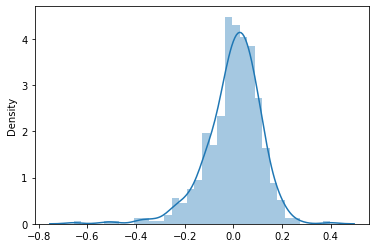

In [100]:
# Let's just quicklyplot a histogram or distribution of residual terms
# so, for that we need to compute residuals.
res = y_train - y_train_pred
sns.distplot(res);

This is the distribution of error terms. error = (y_train - y_train_pred).

So, distribution should be such that it would be centred around 0 and it approximately normal. i'm just qualitatively looking at it.It is approximately centered around zero & normal.

## Step 7 : Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

#### Applying the scaling on the test sets

In [101]:
# create a list of numeric variables.
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

# Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Mon,Sat,Sun,Thurs,Tues,Wed,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept,Mild,pleasant
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


Now, that is the test dataset we have and to verify that all of the variables are scaled appropiately by looking at `df_test.describe()`

In [102]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Mon,Sat,Sun,Thurs,Tues,Wed,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept,Mild,pleasant
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.118721,0.164384,0.178082,0.164384,0.146119,0.127854,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.319635,0.652968
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.324202,0.371472,0.383458,0.371472,0.354034,0.334692,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.467403,0.477117
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


So now, you can notice something intresting here, 

the max values of all these are not exactly 1 especially for `num_vars` because We fit the scaler on the training set.

so, for the minimum and the maximum, it is the transformer which is using Min_Max Scaler cause of which it actually corresponding to the training set and also, we only transformed the test set using those min max values which model learnt from training set.

So, now we are ready to make predictions.

The process is exactly identical to what we have done before to training set.

so, first we create X_test & y_test by df_test. 

we just want to take out price from df_test and rest will be assigned to X_test.

#### Dividing into X_test and y_test

In [103]:
y_test = df_test.pop('cnt')
X_test = df_test

In [104]:
# add a constant 
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,Mon,Sat,Sun,Thurs,Tues,Wed,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept,Mild,pleasant
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
152,1.0,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


So, we have the X_test. but we dont have all the variables in the model. 

So, if we look at in our train model, we have removed 14 variables. 

So, we have to remove those 14 variables from test set as well.

Because, what the model will do is basically multiply corresponding coefficients as here in this too and if we kept those variables (for which  we don't have coefficient) it will throw an error. 

So, we need to drop some variables.

In [105]:
# Creating X_test_sm dataframe by dropping variables from X_test_sm

X_test_sm = X_test_sm.drop(["Sat","Sun","Tues","Thurs",'Wed',"Feb",
                            'Mar','May',"Aug","June","Oct","holiday",
                            'hum','pleasant','temp'], axis = 1)
X_test_sm.head()

,const,yr,workingday,windspeed,Mon,spring,summer,winter,Dec,Jan,July,Nov,Sept,Mild
184,1.0,0,0,0.084219,0,0,0,0,0,0,1,0,0,1
535,1.0,1,1,0.153728,0,0,1,0,0,0,0,0,0,0
299,1.0,0,1,0.334206,0,0,0,1,0,0,0,0,0,1
221,1.0,0,1,0.339570,0,0,0,0,0,0,0,0,0,0
152,1.0,0,1,0.537414,0,0,1,0,0,0,0,0,0,0


In [106]:
# Making predictions using the final model
y_test_pred = lr_model.predict(X_test_sm)

In [107]:
# Evaluate the model
# to do that we can use r2 squared from sklearn.
r2_score(y_true= y_test, y_pred= y_test_pred)

0.7521160595795595

So, you can see that **the r2 on the test set is 0.752 & the r2 on the final model of train set is 0.744**. 

So, this is pretty reasonable, r2 for test set is in range of 5% of training set r2. 

So, we can say that what the model has learnt on the training set, it is also able to generalize very well on the test set. (as the values are pretty close to eachother).

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

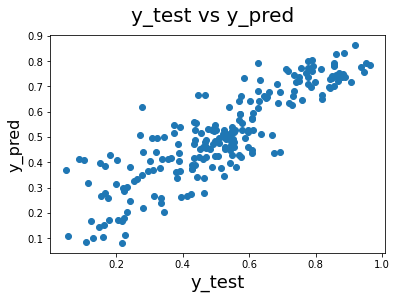

In [108]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) # Plot heading 
plt.xlabel('y_test', fontsize = 18) # X-label
plt.ylabel('y_pred', fontsize = 16) #Y-lable     

### We can see that the equation of our best fitted line is:

**cnt** = (0.2524x**yr**) + (0.0474x**workingday**) + (-0.2242x**windspeed**) + (0.0568x**Mon**) + (-0.25x**spring**) + (-0.0485x**summer**) + (-0.0406x**winter**) + (-0.099x**Dec**) + (-0.1164x**Jan**) + (-0.0168x**July**) + (-0.0905x**Nov**) + (0.0422x**Sept**) + (-0.0752x**Mild**) + 0.5494.

The highest value of the coefficient is corresponding to `year` which is 0.2524 & what does it means is that, `if the year increases by 1 unit, the customer will increases by 0.2524 unit.`

So, that is the interpretation. you can interpret the other things as well.

# Thank you.